In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import operator
import pprint
from matplotlib import pyplot as plt
from IPython.display import Math
import pypropep as ppp

In [2]:
plt.style.use(u'ggplot')
plt.rcParams['figure.figsize'] = (10,6)

## Initalization
First we must initalize the library to load the thermo and propellant files.  Note that they can be overriden in the init function.

In [3]:
help(ppp.init)
ppp.init()

Help on function init in module pypropep:

init(thermo_file=None, propellant_file=None)

Loaded 1921 thermo species
Loaded 1030 propellants


In [4]:
print ppp.find_propellant('methane')

[Propellant: C1H1N3O6 - TRINITROMETHANE (NITROFORM) [949], Propellant: C1F8N4 - TETRAKISDIFLUOROAMINOMETHANE [869], Propellant: C1O6N3CL1 - TRINITROCHLOROMETHANE [942], Propellant: C1N4O8 - TETRANITROMETHANE [878], Propellant: C1O6N3F1 - TRINITROFLUOROMETHANE [946], Propellant: C1H1O6N3 - TRINITROMETHANE [948], Propellant: C1H4 - METHANE [578], Propellant: C1O6N3BR1 - TRINITROBROMEMETHANE [941], Propellant: C1F4O2 - BIS(FLUOROXY)DIFLUOROMETHANE [158], Propellant: C1BR1F3 - BROMOTRIFLUOROMETHANE [181], Propellant: C1H3N1O2 - NITROMETHANE [645], Propellant: C1F4O2 - BIS(FLUOROXY)DIFLUOROMETHANE [159], Propellant: C1F4O1 - FLUOROXYTRIFLUOROMETHANE [383]]


You can get a pretty formula if you want...

In [5]:
Math(ppp.PROPELLANTS['EICOSANE (PARAFFIN)'].formula(tex=True))

<IPython.core.display.Math object>

### Auto-completion of propellants
Rather than searching, jupyter/ipython will auto-complete dictonary keys.  So you can simply do:

```
>>> p = ppp.PROPELLANTS['OXY[TAB]
```
and when you enter [tab] it will either autocomplete the key if there is only one match or pop-up a menu with all the keys that match to chose from.  Note that it will only match from the beginning of the string so if you want to match something mid-name then you'll still have to use find_propellant.

### Sanity checking properties
Let's see how well cpropep is computing thermo properties for nitrogen. [TODO: Put reference properties here]

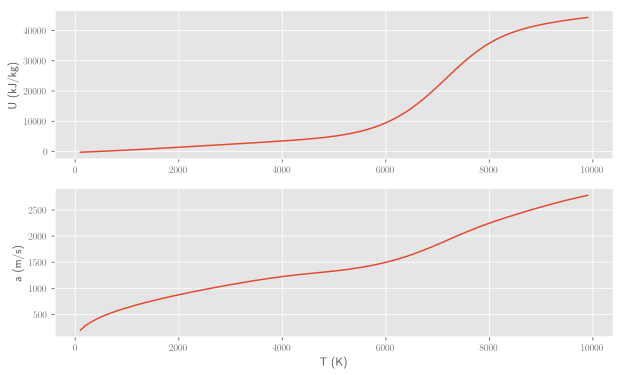

In [6]:
e = ppp.Equilibrium()
air = ppp.PROPELLANTS['NITROGEN (GASEOUS)']
e.add_propellant(air, 1.)
T_v = np.arange(100, 10000, 100)
U_v = np.zeros_like(T_v)
a_v = np.zeros_like(T_v)
for i in xrange(len(T_v)):
    e.set_state(P=1., T=T_v[i], type='TP')
    U_v[i] = e.properties.U
    a_v[i] = e.properties.Vson

ax = plt.subplot(211)
plt.plot(T_v, U_v)
plt.ylabel('U (kJ/kg)')

plt.subplot(212, sharex=ax)
plt.plot(T_v, a_v)
plt.xlabel('T (K)')
plt.ylabel('a (m/s)')


In [7]:
e.set_state(P=1., T=273, type='TP')
print e
print e.composition

Status:
	Equillibrium Computed: True
	Properties Computed: True
	Performance Computed: False
Composition:
	NITROGEN (GASEOUS) - 1.000 mol
State:
	Pressure: 1.000 atm 
	Temperature: 273.0 K 
	Enthalpy: -26.143 kJ/kg 
	Int. Energy: -107.171 kJ/kg 
	Gibbs Free Energy: -1867.365 kJ/kg 
	Entropy: 6.744 kJ/kg-K 
	Molar Mass: 28.013 g/mol 
	dV_P: -1.000
	dV_T: 1.000
	Cp: 1.039 kJ/kg-K
	Cv: 0.743 kJ/kg-K
	gamma: 1.400
	Sound Speed: 336.8 m/s

{'N2': 1.0, 'N3': 0.0, 'N': 0.0}


### Setting up equllibrium calculations
Below is an example for how to setup a simple equillibrium calculation.  We'll use the water gas shift (WGS) reaction to demonstrate.

First load propellants...

In [8]:
e2 = ppp.Equilibrium()
h2o = ppp.PROPELLANTS['WATER']
co = ppp.PROPELLANTS['CARBON MONOXIDE']
e2.add_propellants([(h2o, 1.), (co, 1.)])
print e2

Status:
	Equillibrium Computed: False
	Properties Computed: False
	Performance Computed: False
Composition:
	WATER - 1.000 mol
	CARBON MONOXIDE - 1.000 mol
State:
	Pressure: 0.000 atm 
	Temperature: 0.0 K 
	Enthalpy: 0.000 kJ/kg 
	Int. Energy: 0.000 kJ/kg 
	Gibbs Free Energy: 0.000 kJ/kg 
	Entropy: 0.000 kJ/kg-K 
	Molar Mass: 0.000 g/mol 
	dV_P: 0.000
	dV_T: 0.000
	Cp: 0.000 kJ/kg-K
	Cv: 0.000 kJ/kg-K
	gamma: 0.000
	Sound Speed: 0.0 m/s



Then let's specify state an equillibrate:

In [9]:
e2.set_state(P=1., T=300., type='TP')
print e2
pprint.pprint(e2.composotion_sorted[0:8])

Status:
	Equillibrium Computed: True
	Properties Computed: True
	Performance Computed: False
Composition:
	WATER - 1.000 mol
	CARBON MONOXIDE - 1.000 mol
State:
	Pressure: 1.000 atm 
	Temperature: 300.0 K 
	Enthalpy: -10463.984 kJ/kg 
	Int. Energy: -10492.062 kJ/kg 
	Gibbs Free Energy: -11657.121 kJ/kg 
	Entropy: 3.977 kJ/kg-K 
	Molar Mass: 88.838 g/mol 
	dV_P: -1.036
	dV_T: 1.637
	Cp: 3.170 kJ/kg-K
	Cv: 2.927 kJ/kg-K
	gamma: 1.045
	Sound Speed: 171.3 m/s

[('CO2', 0.25000365060559443),
 ('H2O', 0.009037393119846865),
 ('CH4', 2.4229521184391774e-06),
 ('H2', 3.235481442713829e-08),
 ('CH3COOH', 0.0),
 ('C4H8,cyclo-', 0.0),
 ('CH3OH', 0.0),
 ('C5H10,1-pentene', 0.0)]


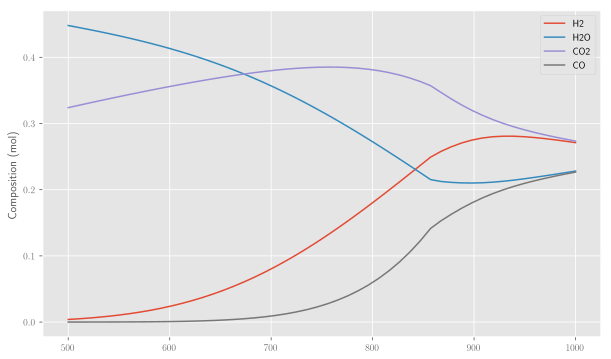

In [10]:
e2.reset()
Ru = 8.314     #kJ / kmol-K
T = np.linspace(500, 1000, 50)
comp = {
    "H2O" : [],
    "CO2" : [],
    "CO"  : [],
    "H2"  : []
}
# eq_const = []
# e2.set_state(P=1., T=300, type='TP')
# G0 = e2.properties.G
for i in xrange(len(T)):
    e2.set_state(P=1., T=T[i], type='TP')
    comp["H2O"].append(e2.composition["H2O"])
    comp["CO2"].append(e2.composition["CO2"])
    comp["CO"].append(e2.composition["CO"])
    comp["H2"].append(e2.composition["H2"])
#     eq_const.append(np.exp(-(G0-e2.properties.G) * (e2.properties.M) / Ru / T[i]))

# ax = plt.subplot(211)
for s,c in comp.items():
    plt.plot(T, c, label=s)
plt.ylabel('Composition (mol)')
plt.legend(loc='best')

# plt.subplot(212,sharex=ax)
# plt.plot(T, eq_const)
# plt.xlabel('Temperature (K)')
# plt.ylabel('Equilibrium constant')

### Adiabatic flame temperature
Now let's do an adiabatic flame temperature problem.  We'll Methane/Oxygen beacause it's well known.

Note that

$$CH_4 + 8 \left[0.75 N_2 + 0.25 O_2\right] \rightarrow 2H_2O + CO_2 + 6 N_2$$

such that at stoichiometric equivalence ratio is defined such that:

$$\frac{N_{CH_4}}{N_{air}} = 0.125$$


Propellant: C1H4 - METHANE [578]
Propellant: N835O224AR5 - AIR (DRY AT SEA LEVEL) [15]


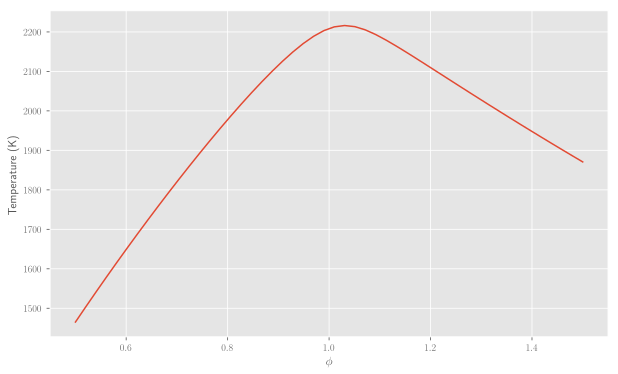

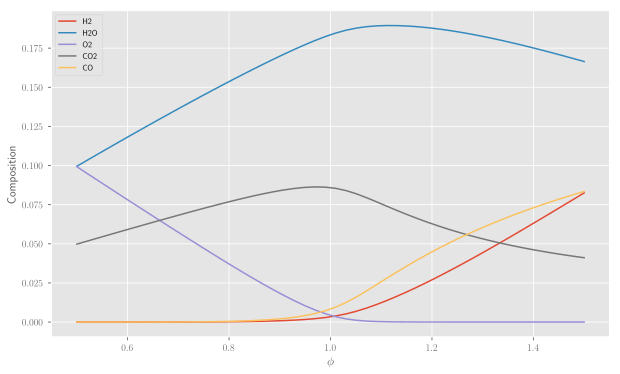

In [11]:
ch4 = ppp.PROPELLANTS['METHANE']
air = ppp.PROPELLANTS['AIR (DRY AT SEA LEVEL)']
species = ['H2', 'H2O', 'O2', 'CO2', 'CO']
phi = np.linspace(0.5, 1.5, 50)
T_adiabatic = []
N_ratio_st = 224. / 4
print ch4
print air

comp = dict()
for s in species:
    comp[s] = []
for i in xrange(len(phi)):
    e3 = ppp.Equilibrium()
    n_fuel = phi[i] * N_ratio_st
    e3.add_propellants([(ch4, n_fuel), (air, 1.)])
    e3.set_state(P=1., type='HP')
    T_adiabatic.append(e3.properties.T)
    for s in species:
        comp[s].append(e3.composition[s])
    
plt.plot(phi, T_adiabatic)
plt.xlabel(r"$\phi$")
plt.ylabel("Temperature (K)")

plt.figure()
for s in species:
    plt.plot(phi, comp[s], label=s)
plt.xlabel(r"$\phi$")
plt.ylabel("Composition")
plt.legend(loc='best', fontsize='small')